# Task 2: Decision Trees for Human Activity Recognition 

## 1.Creating Decision Tree using SkLearn

### Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model.

#### Importing libraries

In [401]:
import sklearn as skl
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from MakeDataset import X_train,X_test,y_train,y_test
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
activities=["Walking","Walking Upstairs","Walking Downstairs","Sitting","Standing","Laying"]


### Normalization

In [402]:
def my_normalise(acc_tr,acc_te):
    meany=np.mean(acc_tr)
    stdy=np.std(acc_tr)
    acc__tr_n=(acc_tr-meany)/(stdy)
    acc_te_n=(acc_te-meany)/(stdy)
    return acc__tr_n,acc_te_n

In [403]:
acc_x_tr=[]
acc_y_tr=[]
acc_z_tr=[]
for i in range(126):
    for j in range(500):
        acc_x_tr.append(X_train[i][j][0])
        acc_y_tr.append(X_train[i][j][1])
        acc_z_tr.append(X_train[i][j][2])
acc_x_te=[]
acc_y_te=[]
acc_z_te=[]
for i in range(54):
    for j in range(500):
        acc_x_te.append(X_test[i][j][0])
        acc_y_te.append(X_test[i][j][1])
        acc_z_te.append(X_test[i][j][2])



In [404]:

print(len(acc_x_tr))

# acc_x_tr = X_train[:][:][0]

# print(type(acc_x_tr))


63000


In [405]:
acc_x_tr_n,acc_x_te_n=my_normalise(acc_x_tr,acc_x_te)
acc_y_tr_n,acc_y_te_n=my_normalise(acc_y_tr,acc_y_te)
acc_z_tr_n,acc_z_te_n=my_normalise(acc_z_tr,acc_z_te)
acc_x_tr_n=np.array(acc_x_tr_n)
acc_y_tr_n=np.array(acc_y_tr_n)
acc_z_tr_n=np.array(acc_z_tr_n)
acc_x_te_n=np.array(acc_x_te_n)
acc_y_te_n=np.array(acc_y_te_n)
acc_z_te_n=np.array(acc_z_te_n)


Reshaping the normalised data to 3d-training data shape

In [406]:
stacked_tr=np.stack((acc_x_tr_n,acc_y_tr_n,acc_z_tr_n),axis=1)
X_train_n=stacked_tr.reshape(126,500,3)
X_train_n_rs=X_train_n.reshape(126,1500)
stacked_te=np.stack((acc_x_te_n,acc_y_te_n,acc_z_te_n),axis=1)
X_test_n=stacked_te.reshape(54,500,3)
X_test_n_rs=X_test_n.reshape(54,1500)
# print(X_train.reshape(126,1500))
# print(X_train_n_rs)
# print(X_test.reshape(54,1500))
# print(X_test_n_rs)

In [407]:
x=X_train_n_rs
y=y_train
xt=X_test_n_rs

#### Using Gini

##### Making Decision Tree

In [408]:
sk_dt=tree.DecisionTreeClassifier(criterion="gini",random_state=42)
sk_dt=sk_dt.fit(x,y)
depth=sk_dt.get_depth()
print("Depth of Decision Tree:",depth)

Depth of Decision Tree: 8


##### Decision Tree Plot

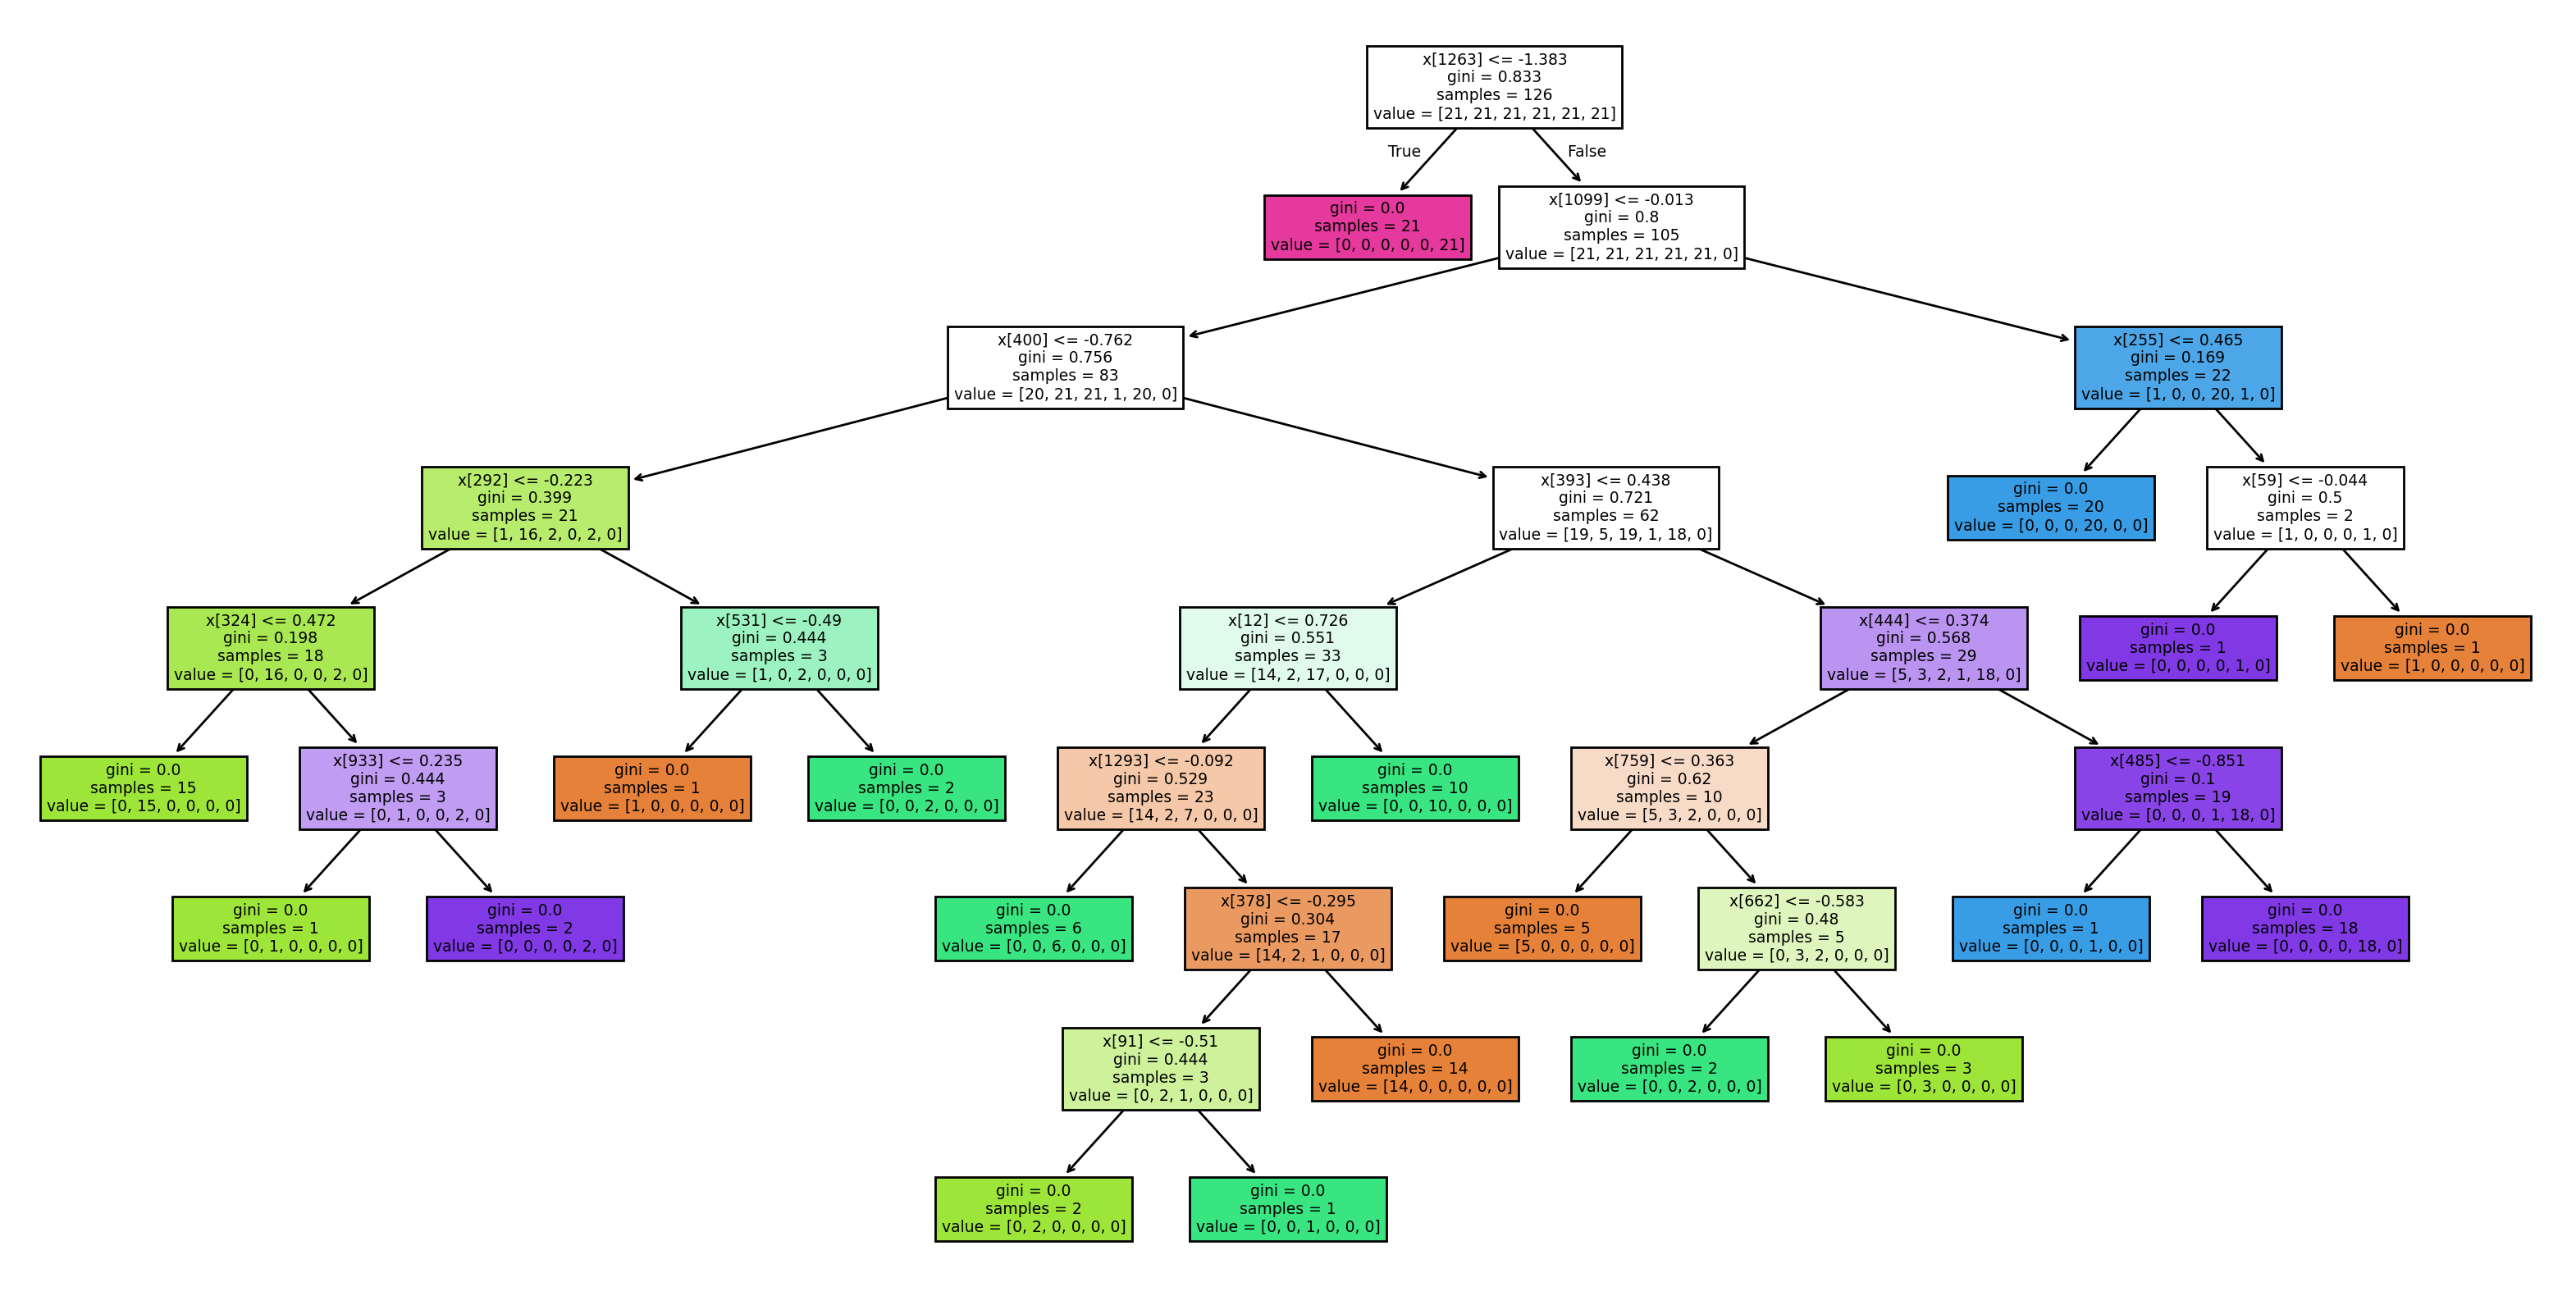

In [409]:
plt.figure(figsize=(20,10))
tree.plot_tree(sk_dt, filled=True)
plt.show()

##### Accuracy, Precision, Recall and Confusion matrix of the model.

Accuracy :  0.5370370370370371
Precision :  0.5567142008318479
Recall :  0.537037037037037


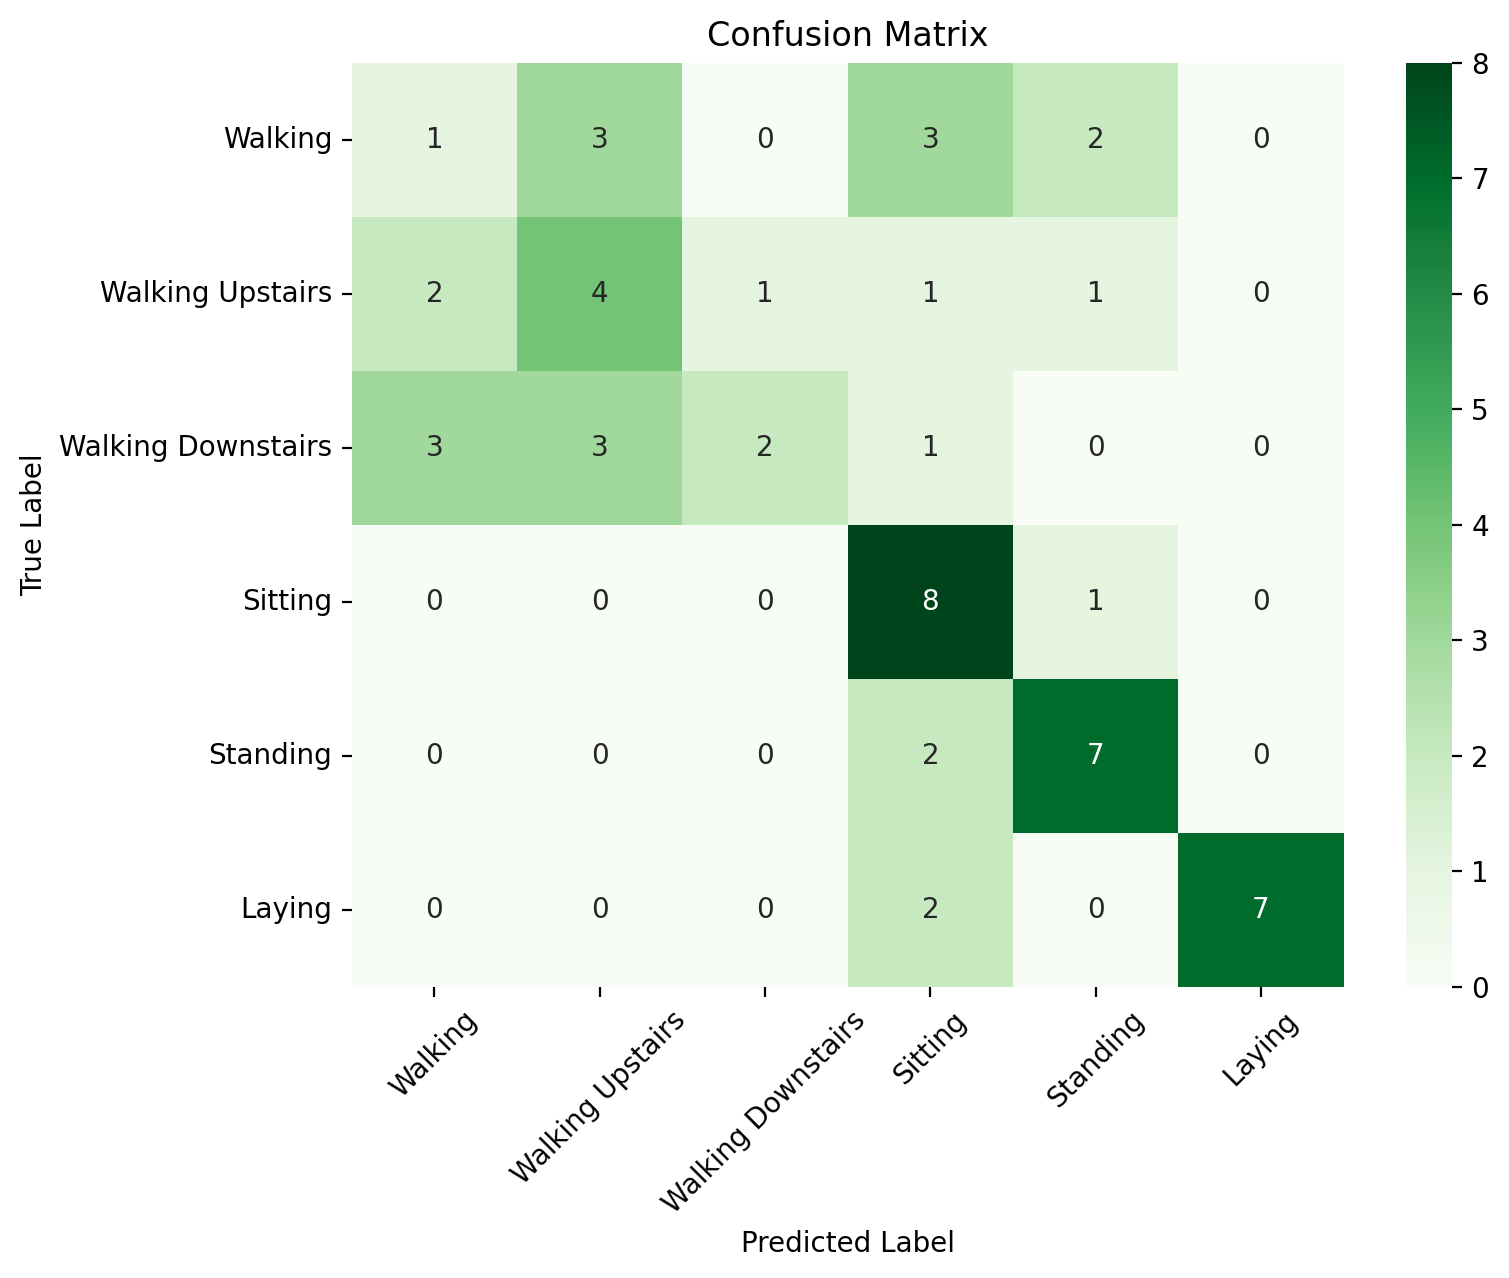

In [410]:

y_hat=sk_dt.predict(xt)
a=skl.metrics.accuracy_score(y_test,y_hat)
print("Accuracy : ",a)
p=skl.metrics.precision_score(y_test,y_hat,average='macro')
print("Precision : ",p)
r=skl.metrics.recall_score(y_test,y_hat,average='macro')
print("Recall : ",r)
cm=skl.metrics.confusion_matrix(y_test,y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Using Entropy

##### Making Decision Tree

In [411]:
X_train_rs=X_train.reshape(126,1500)
X_test_rs=X_test.reshape(54,1500)
x=X_train_rs
y=y_train
sk_dt=tree.DecisionTreeClassifier(criterion="entropy",random_state=42)
sk_dt=sk_dt.fit(x,y)
depth=sk_dt.get_depth()
print("Depth of Decision Tree:",depth)

Depth of Decision Tree: 7


##### Decision Tree Plot

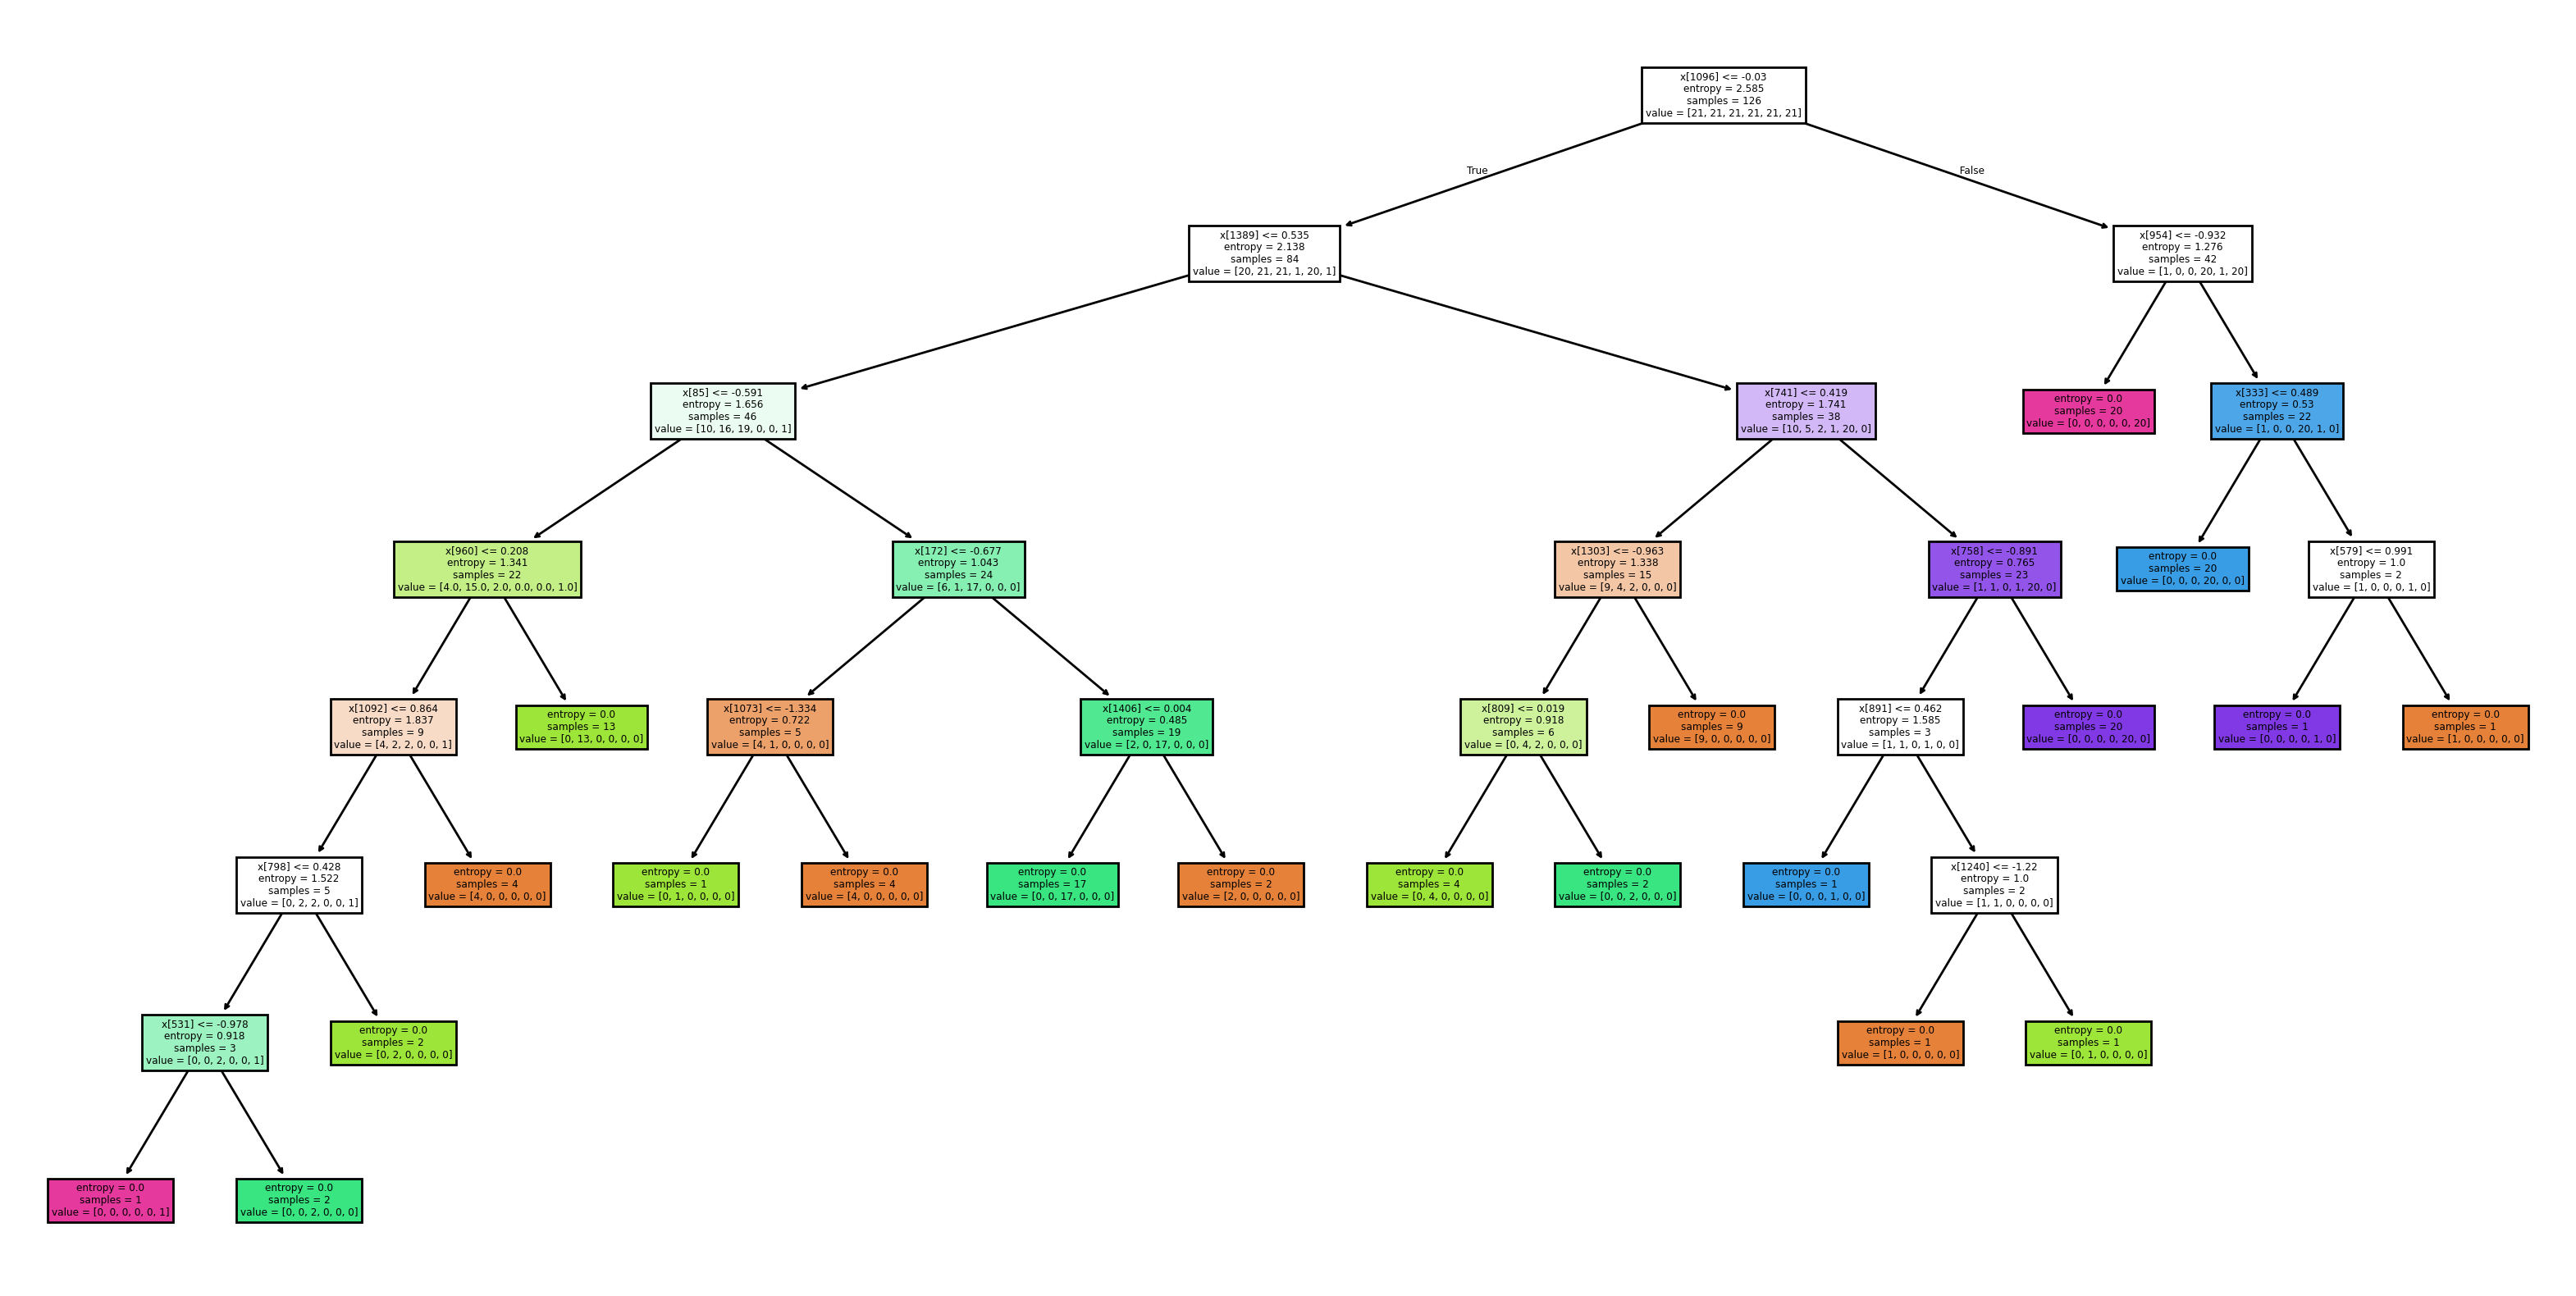

In [412]:
plt.figure(figsize=(20,10))
tree.plot_tree(sk_dt, filled=True)
plt.show()

##### Accuracy, Precision, Recall and Confusion matrix of the model.

Accuracy :  0.5925925925925926
Precision :  0.5282865282865282
Recall :  0.5925925925925926


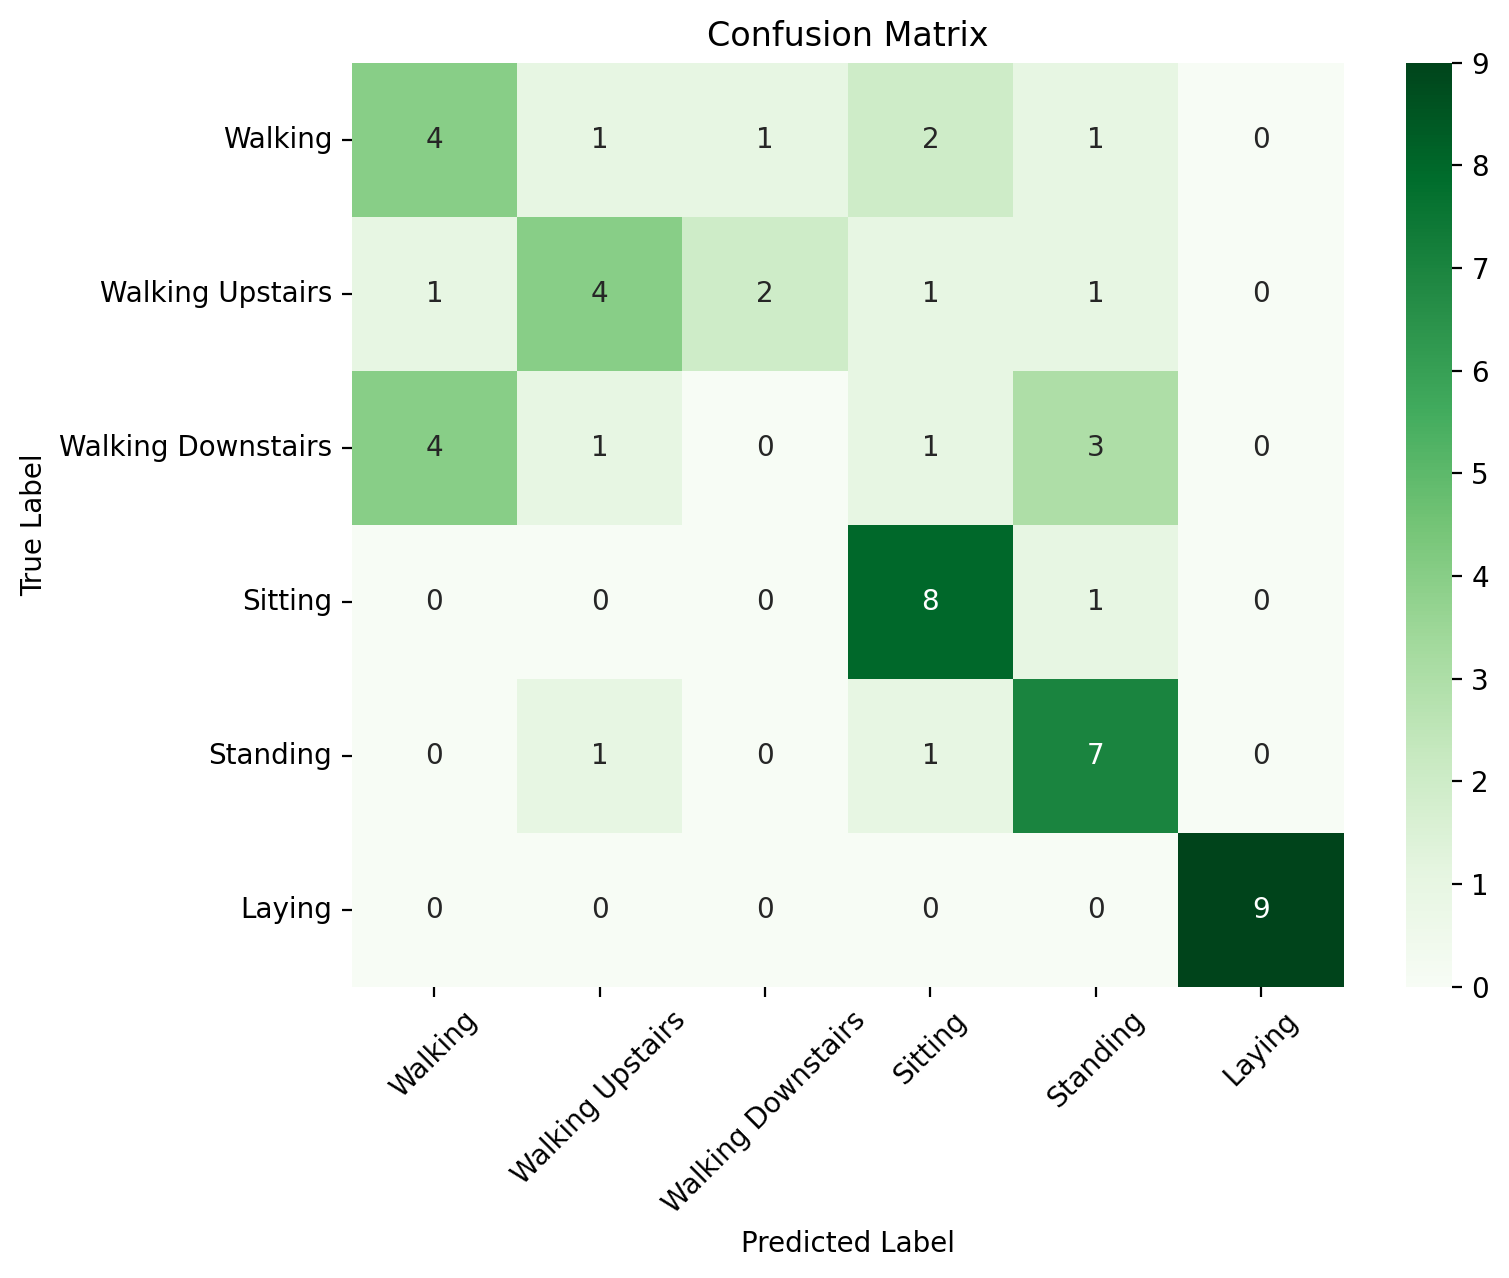

In [413]:

y_hat=sk_dt.predict(xt)
a=skl.metrics.accuracy_score(y_test,y_hat)
print("Accuracy : ",a)
p=skl.metrics.precision_score(y_test,y_hat,average='macro')
print("Precision : ",p)
r=skl.metrics.recall_score(y_test,y_hat,average='macro')
print("Recall : ",r)
cm=skl.metrics.confusion_matrix(y_test,y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## 2.Train Decision Tree with varying depths (2-8) using all above 3 methods. Plot the accuracy of the model on test data vs the depth of the tree. 

### With gini criterion

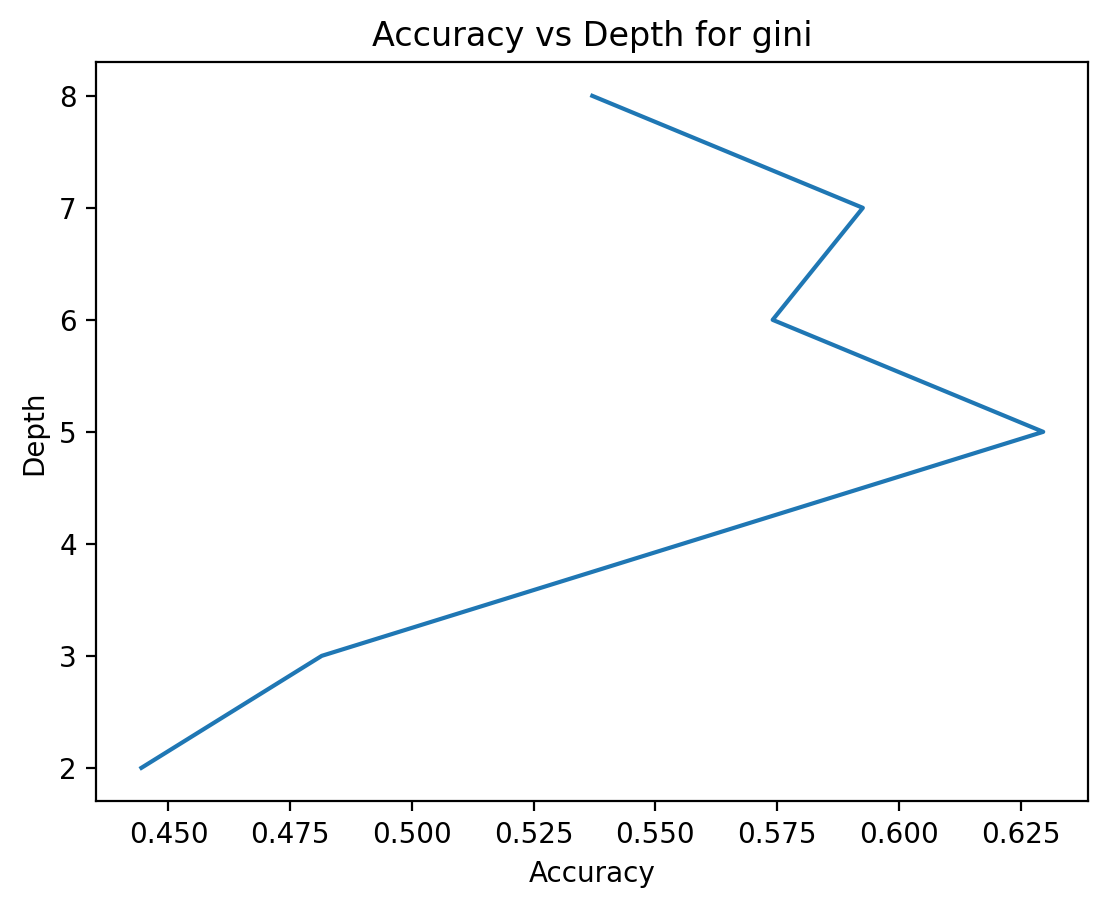

In [414]:
dep=np.arange(2,9)
accuracy_list=[]
for i in dep:
    skl_dt=tree.DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=i)
    skl_dt=skl_dt.fit(x,y)
    y_hat1=skl_dt.predict(xt)
    acc=skl.metrics.accuracy_score(y_test,y_hat1)
    accuracy_list.append(acc)
plt.plot(accuracy_list,dep)
plt.xlabel("Accuracy")
plt.ylabel("Depth")
plt.title("Accuracy vs Depth for gini")
plt.show()


### With entropy criterion

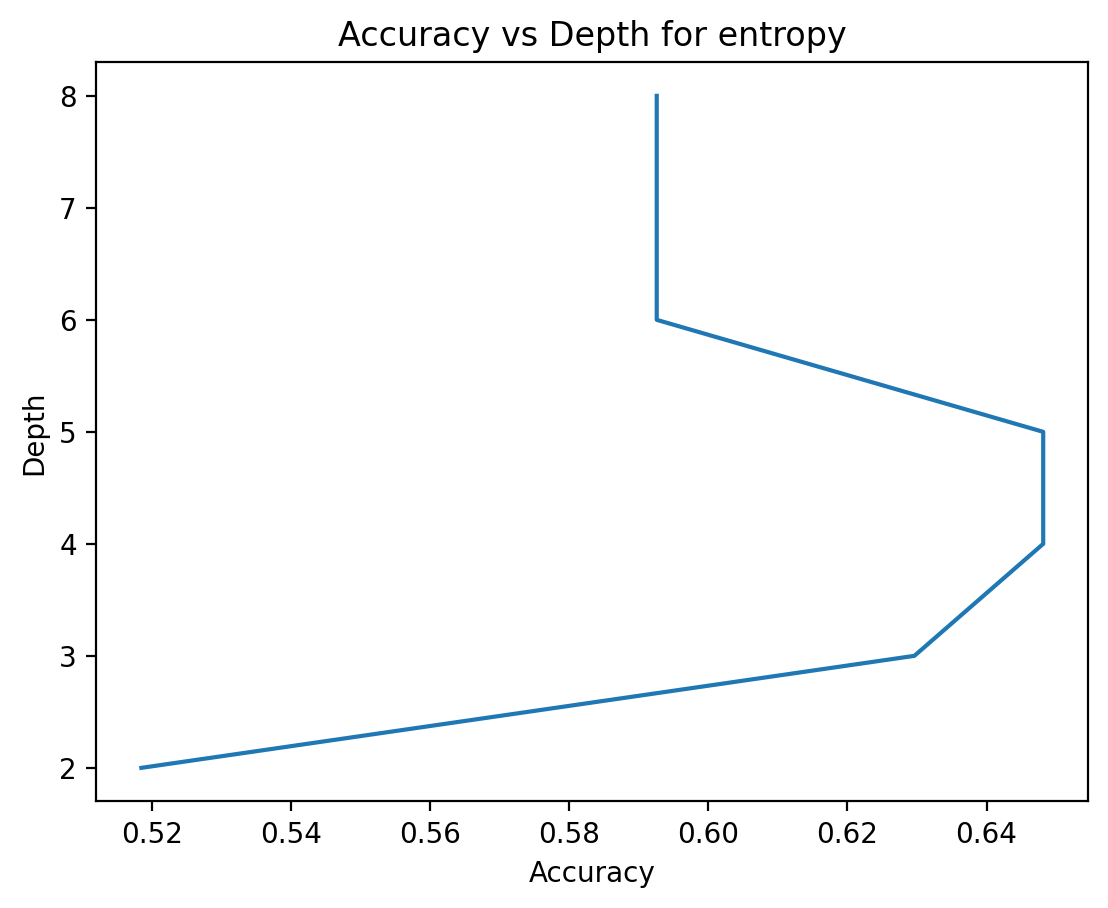

In [416]:
dep=np.arange(2,9)
accuracy_list=[]
for i in dep:
    skl_dt=tree.DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=i)
    skl_dt=skl_dt.fit(x,y)
    y_hat1=skl_dt.predict(xt)
    acc=skl.metrics.accuracy_score(y_test,y_hat1)
    accuracy_list.append(acc)
plt.plot(accuracy_list,dep)
plt.xlabel("Accuracy")
plt.ylabel("Depth")
plt.title("Accuracy vs Depth for entropy")
plt.show()
